In [3]:
import pandas as pd
import numpy as np
from astropy.constants import u as m_p
from astropy import units as u
from astropy.constants import c,h,k_B, m_p, sigma_T, m_e, e

import matplotlib.pyplot as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

# 1 a

In [4]:
r0 = (e.gauss)**2 / (m_e.cgs * (c.cgs)**2)
r0 = r0.cgs
#theta= np.linspace(-np.pi,np.pi, 50)
theta= np.linspace(0,2*np.pi, 500)

In [5]:
#define dsigma/domega equation
#retuns value for dsigma/domega for given epsilon
def ds_do_func(epsilon):
    epsilon1 = epsilon / (1 + (epsilon / (m_e.cgs * (c.cgs)**2)) * (1 - np.cos(theta)))
    ds_do = (r0**2 * epsilon1**2 / (2 * epsilon**2)) * ((epsilon / epsilon1) + (epsilon1 / epsilon) - np.sin(theta)**2)
    return ds_do

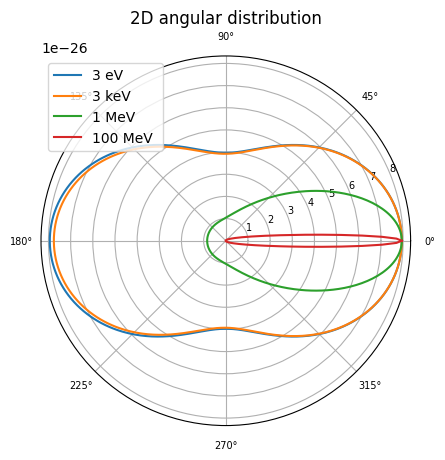

In [129]:
#create plot in polar coordinates

plt.polar(theta,ds_do_func(((3* u.eV).cgs)), label = '3 eV')
plt.polar(theta,ds_do_func(((3* u.keV).cgs)), label = '3 keV')
plt.polar(theta,ds_do_func(((1* u.MeV).cgs)), label = '1 MeV')
plt.polar(theta,ds_do_func(((100* u.MeV).cgs)), label = '100 MeV ')

#plt.yscale('log')        #plot using a logarithmic scale 
plt.legend(loc='upper left')
plt.title('2D angular distribution')
plt.tick_params(labelsize=7)

In [ ]:
This behaves how we would expect.


# 1 b

In [5]:
#define very long equation for cross section (given)
#returns cross section value for given x

def cross_section_func(x):
    term1 = ((1 + x) / x**3) * ((2*x*(1 + x)) / (1 + 2*x) - np.log(1 + 2*x))
    term2 = (1 / (2*x)) * np.log(1 + 2*x)
    term3 = (1 + 3*x) / (1 + 2*x)**2
    
    cross_section = (3/4) * (sigma_T.cgs) * (term1 + term2 - term3)

    return cross_section.value


In [6]:
x = np.logspace(-3,3, 10000)    #define frequency
cross_section = cross_section_func(x)

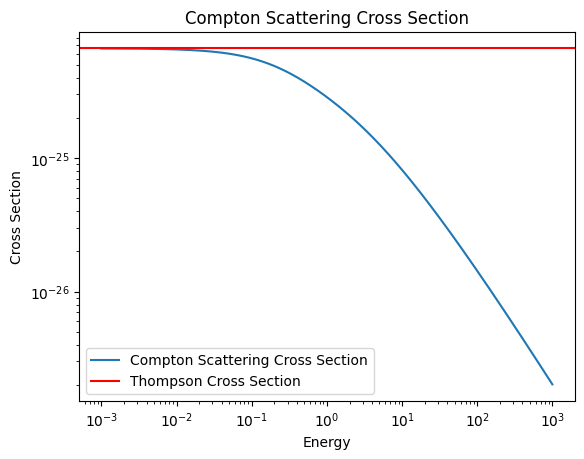

In [8]:
#plot cross energy v cross section
plt.plot(x, cross_section, label = 'Compton Scattering Cross Section')
#add horizontal line at the vlaue of sigma_T for comparison
plt.axhline(y= (sigma_T.cgs).value, color='r', linestyle='-', label='Thompson Cross Section')

plt.xlabel('Energy')
plt.ylabel('Cross Section')

plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.title('Compton Scattering Cross Section')
plt.show()

# 2 c

In [7]:
#define constants
omega = 1e9 *u.Hz * 2*np.pi
n_e =  1 * (u.cm)**(-3)      #from class
B =  (5*10**(-6) * (u.erg**(.5)/u.cm**(3/2)))   #Troland
del_x = (10 * np.pi/180)   #radians
integral = n_e * B

In [8]:
#calculate distance using formula that I found
d= (((2 * np.pi * e.gauss**3 / (m_e.cgs**2 * c.cgs**2 * omega**2)) * integral)**(-1)) * del_x
d.to(u.cm)

<Quantity 1.4760917e+18 cm>

In [9]:
d.to(u.pc)

<Quantity 0.47836874 pc>

# 2 d


In [10]:
#define dt/domega
dt_dw = -((4*np.pi* e.gauss**2)/(m_e*c*omega**3))*n_e*d/u.rad
dt_dw.decompose()

<Quantity -6.31736678e-13 s2 / rad>

# 2 e

In [128]:
from scipy.optimize import curve_fit

In [129]:
#define function to fit
def fit_func(x, a, c):
    return a * (1/(x**(2))) + c

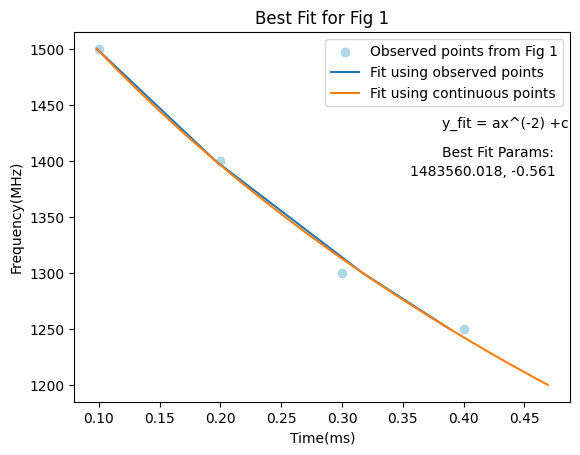

In [147]:
#create plot that displays the observed points, and fits from first graph

x_obs = np.array([100,200,300,400]) * 10**(-3)
y_obs = np.array([1.5, 1.4, 1.3, 1.25]) * 10**3

plt.scatter(x_obs,y_obs, color = 'lightblue', label = 'Observed points from Fig 1')
params = curve_fit(fit_func, y_obs, x_obs)
[a, c] = params[0]
x_calc = fit_func(y_obs, a, c)
plt.plot(x_calc, y_obs, label = 'Fit using observed points')

n1= 1.2* 10**3
n2 = 1.5* 10**3
y_fit = np.linspace(n1,n2,50)
x_fit = fit_func(y_fit, a, c)
plt.plot(x_fit,y_fit, label = 'Fit using continuous points')
plt.figtext(0.7, 0.68, f'y_fit = ax^(-2) +c')
plt.figtext(0.7, 0.62, f'Best Fit Params:')
plt.figtext(0.65, 0.58, f'{a:.3f}, {c:.3f}')
plt.legend()
plt.title('Best Fit for Fig 1')
plt.xlabel('Time(ms)')
plt.ylabel('Frequency(MHz)')
plt.show()

In [148]:
a1=a

In [ ]:
d_psi = np.pi
d_omega = 2*np.pi*d_freq

In [113]:
def fit_func2(w, a, c):
    return a * (1/(w**(2))) + c

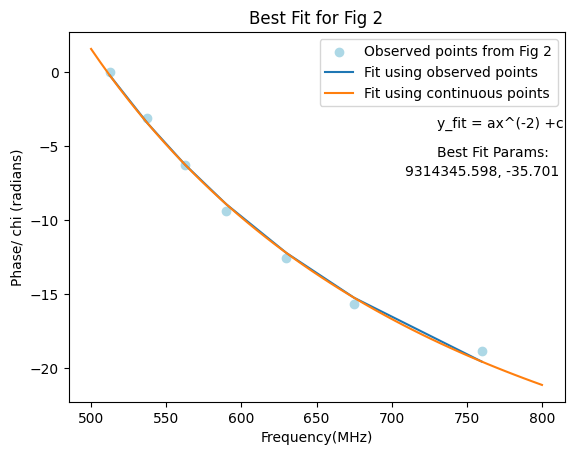

In [114]:
#create plot that displays the observed points, and fits from second graph

freq = np.array([512.5,537.5,562.5,590,630,675,760])
phase = np.array([0,-np.pi,-2*np.pi,-3*np.pi,-4*np.pi,-5*np.pi,-6*np.pi])

plt.scatter(freq,phase, color = 'lightblue', label = 'Observed points from Fig 2')
params = curve_fit(fit_func2, freq, phase)
[a, c] = params[0]
phase_calc = fit_func2(freq, a, c)
plt.plot(freq, phase_calc, label = 'Fit using observed points')
#x_fit = np.linspace(100,400,50)
freq_fit = np.linspace(500,800,50)
phase_fit = fit_func2(freq_fit, a, c)
plt.plot(freq_fit,phase_fit, label = 'Fit using continuous points')
plt.figtext(0.7, 0.68, f'y_fit = ax^(-2) +c')
plt.figtext(0.7, 0.62, f'Best Fit Params:')
plt.figtext(0.65, 0.58, f'{a:.3f}, {c:.3f}')
plt.legend()
plt.title('Best Fit for Fig 2')
plt.ylabel('Phase/ chi (radians)')
plt.xlabel('Frequency(MHz)')
plt.show()


In [149]:
from astropy.constants import c

In [150]:
a2=a

In [152]:
#calculate magnetic field using equation found in previous part
B=m_e.cgs*c.cgs *a2/(a1*e.gauss.value)
B

<Quantity 5.6856301e-08 cm g / s>